# Baby Name EDA using Pandas
United States Births from 1880-2020

In [3]:
import pandas as pd #dataframe + analysis
import matplotlib.pyplot as plt #visualizations
import seaborn as sns #visualizations

#import data and get a look at structure
df = pd.read_csv('c:/users/tommy/data/babynames.csv')
df.head()

,Year,Name,Gender,Births,Rank
0,2020,Liam,M,19659,1
1,2020,Noah,M,18252,2
2,2020,Oliver,M,14147,3
3,2020,Elijah,M,13034,4
4,2020,William,M,12541,5


In [33]:
#check for null values
df.isnull().sum()

Year               0
Name               0
Gender             0
Births             0
Rank               0
Name Length        0
Starting Letter    0
dtype: int64

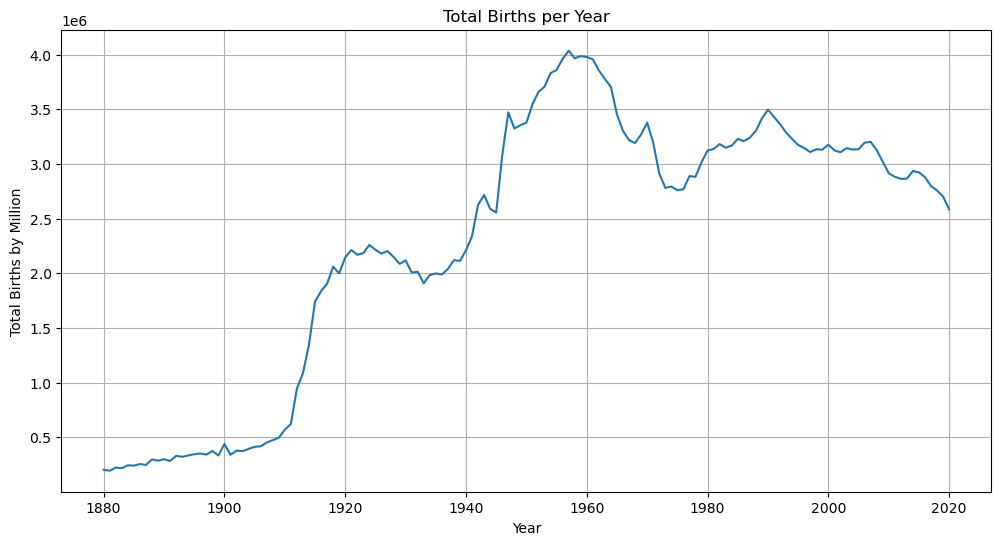

In [5]:
#Get a look a birthrate over time
df.groupby('Year')['Births'].sum().plot(kind='line', figsize=(12, 6))
plt.title('Total Births per Year')
plt.xlabel('Year')
plt.ylabel('Total Births by Million')
plt.grid(True)
plt.show()

In [26]:
# Group the data by gender and calculate the total number of births
total_births = df.groupby('Gender')['Births'].sum()

# Print the total number of male and female births
print(f"Total births:\nMale: {total_births['M']}\nFemale: {total_births['F']}")

Total births:
Male: 168617045
Female: 155842871


C:\Users\tommy\AppData\Local\Temp\ipykernel_5076\910242570.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(labels)


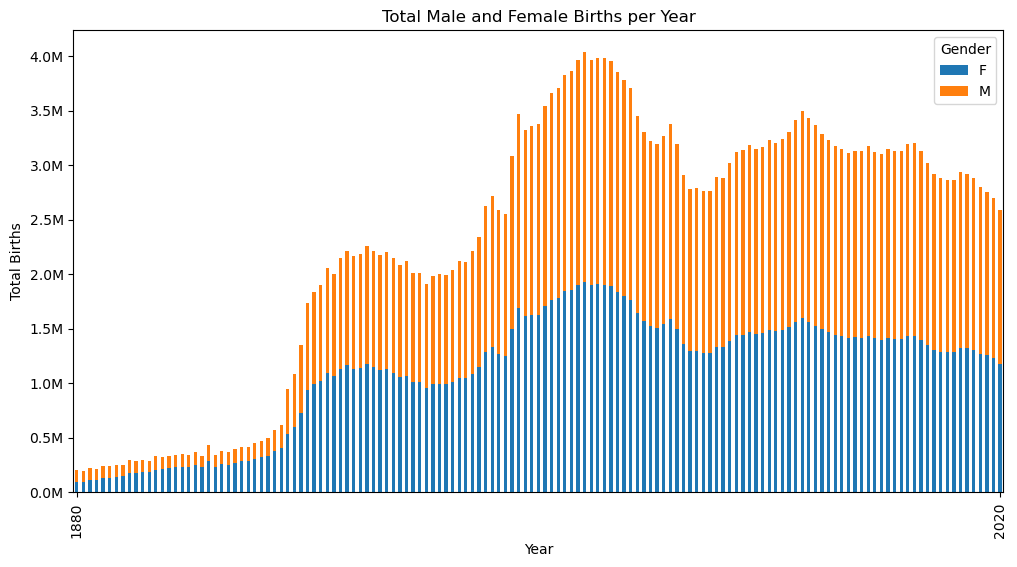

In [36]:
# separate births into gender categories
gender_births = df.groupby(['Year', 'Gender'])['Births'].sum().unstack()
gender_births.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Total Male and Female Births per Year')
plt.xlabel('Year')
plt.ylabel('Total Births')

# Format y-axis labels to represent millions
labels = ['{:.1f}M'.format(x / 1_000_000) for x in plt.gca().get_yticks()]
plt.gca().set_yticklabels(labels)

# Set x-axis ticks to only include 1880 and 2020 to reduce clutter
plt.xticks([0, len(gender_births) - 1], ['1880', '2020'])
plt.show()

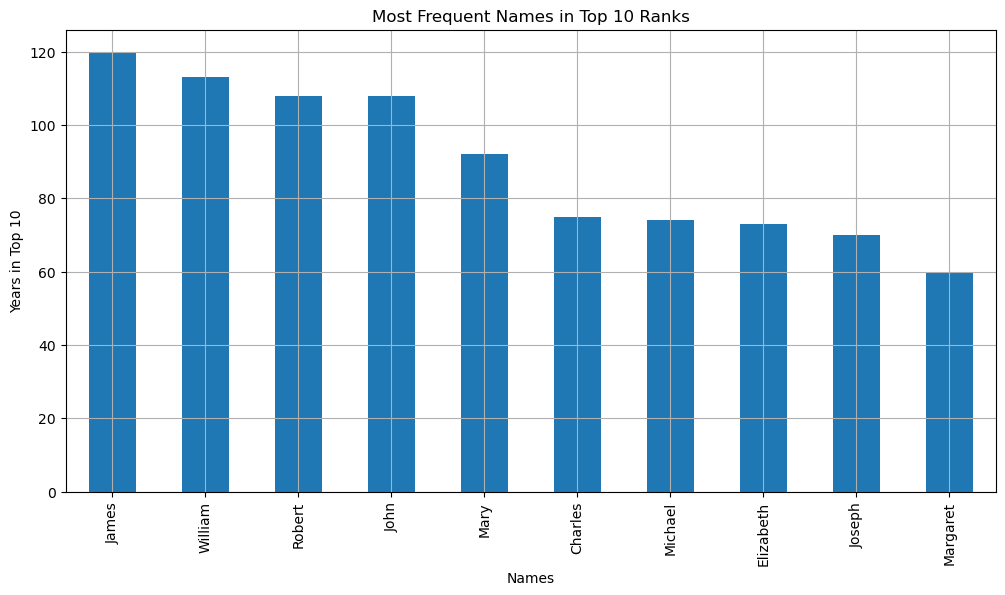

In [39]:
#Find 10 most popular names
top_names = df[df['Rank'] <= 10]['Name'].value_counts().head(10)
top_names.plot(kind='bar', figsize=(12, 6))
plt.title('Most Frequent Names in Top 10 Ranks')
plt.xlabel('Names')
plt.ylabel('Years in Top 10')
plt.grid(True)
plt.show()

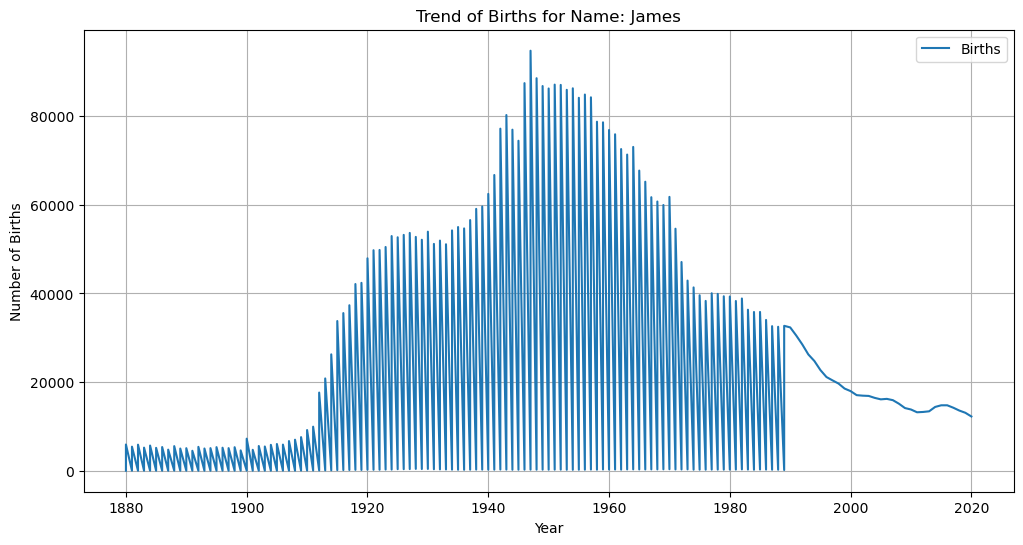

In [7]:
#Get a look at the trends of the most common name (indexes could be substituted)
most_common_name = top_names.idxmax()
name_data = df[df['Name'] == most_common_name]
name_data.plot(x='Year', y='Births', kind='line', figsize=(12, 6))
plt.title(f'Trend of Births for Name: {most_common_name}')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.grid(True)
plt.show()

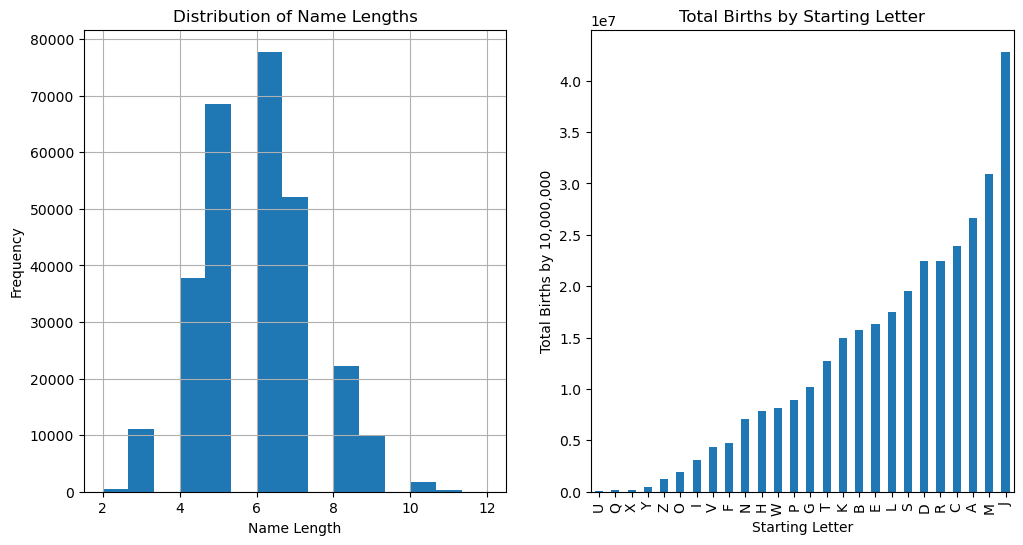

<Figure size 640x480 with 0 Axes>

In [41]:
#Find most common name length, and starting letter
df['Name Length'] = df['Name'].apply(len)
df['Starting Letter'] = df['Name'].apply(lambda x: x[0])

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot the distribution of name lengths
df['Name Length'].plot(kind='hist', bins=15, ax=ax[0])
ax[0].set_title('Distribution of Name Lengths')
ax[0].set_xlabel('Name Length')
ax[0].set_ylabel('Frequency')
ax[0].grid(True)

# Extract the first letter of each name
df['First Letter'] = df['Name'].str[0]

# Group the data by the first letter and calculate the total number of births
births_by_first_letter = df.groupby('First Letter')['Births'].sum()

# Create a bar chart of the total number of births by starting letter
births_by_first_letter.sort_values().plot(kind='bar', figsize=(12, 6))
plt.title('Total Births by Starting Letter')
plt.xlabel('Starting Letter')
plt.ylabel('Total Births by 10,000,000')
plt.show()

plt.tight_layout()
plt.show()

In [29]:
def get_year_summary(year):
    # Filter the data for the given year
    year_data = df[df['Year'] == year]

    # Calculate the total number of births
    total_births = year_data['Births'].sum()

    # Get the most popular male and female names
    most_popular_male_name = year_data[year_data['Gender'] == 'M']['Name'].iloc[0]
    most_popular_female_name = year_data[year_data['Gender'] == 'F']['Name'].iloc[0]

    return total_births, most_popular_male_name, most_popular_female_name

# Test the function with a sample year
year = 1990  # Change this to the year you're interested in
total_births, most_popular_male_name, most_popular_female_name = get_year_summary(year)
print(f'Total births in {year}: {total_births}')
print(f'Most popular male name in {year}: {most_popular_male_name}')
print(f'Most popular female name in {year}: {most_popular_female_name}')

Total births in 1990: 3496598
Most popular male name in 1990: Michael
Most popular female name in 1990: Jessica


In [32]:
def get_decade_summary(year):
    # Calculate the start of the decade
    decade_start = (year // 10) * 10

    # Filter the data for the given decade
    decade_data = df[(df['Year'] >= decade_start) & (df['Year'] < decade_start + 10)]

    # Calculate the total number of births
    total_births = decade_data['Births'].sum()

    # Get the most popular male and female names
    most_popular_male_name = decade_data[decade_data['Gender'] == 'M']['Name'].value_counts().idxmax()
    most_popular_female_name = decade_data[decade_data['Gender'] == 'F']['Name'].value_counts().idxmax()

    return total_births, most_popular_male_name, most_popular_female_name

# Test the function with a sample year
year = 1967  # Change this to the year you're interested in
total_births, most_popular_male_name, most_popular_female_name = get_decade_summary(year)
print(f'Total births in {year // 10 * 10}s: {total_births}')
print(f'Most popular male name in {year // 10 * 10}s: {most_popular_male_name}')
print(f'Most popular female name in {year // 10 * 10}s: {most_popular_female_name}')

Total births in 1960s: 35708236
Most popular male name in 1960s: Michael
Most popular female name in 1960s: Lisa
